In [92]:
# import Pandas to use for data cleaning 
import pandas as pd
import seaborn as sns

# Import file for data cleaning #

In [61]:
# fetch the file we are going to begin with and visualise the first 5 rows
data = pd.read_csv('price_paid_records.csv')


# Data Cleaning #

In [62]:
# sort the data in ascending to check up until what year it goes and then visualise through data.tail()
data = data.sort_values(by=['Date of Transfer'], ascending=True)
data.tail()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
22362577,{5376B386-4BF0-34C1-E053-6B04A8C09FF6},527500,2017-06-29 00:00,D,N,F,HEMEL HEMPSTEAD,DACORUM,HERTFORDSHIRE,B,A
22170578,{5376B385-57BD-34C1-E053-6B04A8C09FF6},277000,2017-06-29 00:00,S,N,F,WICKFORD,BASILDON,ESSEX,A,A
22227348,{5376B385-E03E-34C1-E053-6B04A8C09FF6},551000,2017-06-29 00:00,T,N,F,CHISLEHURST,BROMLEY,GREATER LONDON,A,A
22401945,{5376B386-659E-34C1-E053-6B04A8C09FF6},250000,2017-06-29 00:00,D,N,F,SALISBURY,WILTSHIRE,WILTSHIRE,B,A
22461663,{5376B386-089F-34C1-E053-6B04A8C09FF6},255000,2017-06-29 00:00,D,N,F,WASHINGTON,SUNDERLAND,TYNE AND WEAR,A,A


In [63]:
# create a copy of the original dataframe with the columns we are interested in
new_data = data[['Date of Transfer','Price', 'Property Type', 'Old/New', 'County', 'Town/City', 'District']].copy()

In [64]:
# check that the new dataframe looks like we want it to
new_data.sample(n = 10)

,Date of Transfer,Price,Property Type,Old/New,County,Town/City,District
20840059,2015-11-12 00:00,169000,S,N,LEICESTERSHIRE,LEICESTER,OADBY AND WIGSTON
3401363,1998-10-30 00:00,95000,F,N,CHESHIRE,WILMSLOW,MACCLESFIELD
17089538,2011-04-15 00:00,218600,D,N,DEVON,BIDEFORD,TORRIDGE
19674300,2014-06-20 00:00,288000,D,N,LEICESTER,LEICESTER,LEICESTER
8474213,2002-11-01 00:00,159950,S,N,NORTHAMPTONSHIRE,WELLINGBOROUGH,WELLINGBOROUGH
7907081,2002-11-04 00:00,140000,S,N,GREATER LONDON,ROMFORD,HAVERING
9603045,2003-05-16 00:00,245000,D,N,LANCASHIRE,PRESTON,WYRE
18918517,2013-08-08 00:00,285000,D,N,HAMPSHIRE,SOUTHAMPTON,FAREHAM
20180872,2015-06-26 00:00,289950,D,Y,LEICESTERSHIRE,LEICESTER,HINCKLEY AND BOSWORTH
21430360,2016-09-30 00:00,84523,T,Y,COUNTY DURHAM,SPENNYMOOR,COUNTY DURHAM


In [65]:
# make sure there are no nulls in the County column, as it will be used to filter later on.
number_of_nans = new_data['County'].isnull().sum()
number_of_nans

0

In [66]:
#  Make a new dataframe from the new_data dataframe but only include rows where the column county equals greater london.
london_data = new_data.loc[new_data['County'].str.contains('LONDON', na=False)]

In [67]:
# check that it looks the way we want to. 
london_data.tail()
# london_data.head()

,Date of Transfer,Price,Property Type,Old/New,County,Town/City,District
22461166,2017-06-28 00:00,369950,F,N,GREATER LONDON,LONDON,CAMDEN
22281359,2017-06-28 00:00,485000,T,N,GREATER LONDON,LONDON,REDBRIDGE
22380614,2017-06-28 00:00,775000,T,N,GREATER LONDON,LONDON,WANDSWORTH
22122189,2017-06-28 00:00,420000,T,N,GREATER LONDON,LONDON,BEXLEY
22227348,2017-06-29 00:00,551000,T,N,GREATER LONDON,CHISLEHURST,BROMLEY


In [68]:
# are the datatypes correct for analysis?
london_data.dtypes
# we can see 'Date of Transfer' is an object, ideally it should be a date so we can extract the year later on.

Date of Transfer    object
Price                int64
Property Type       object
Old/New             object
County              object
Town/City           object
District            object
dtype: object

In [69]:
# transform the data type from Date of Transfer to 'datetime64'
london_data['Date of Transfer'] = london_data['Date of Transfer'].astype('datetime64')

/var/folders/gj/tkh2rb516yldhdm4vjvbqmyh0000gp/T/ipykernel_1444/3689114541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_data['Date of Transfer'] = london_data['Date of Transfer'].astype('datetime64')


In [70]:
# check that we have changed it correctly
london_data.dtypes

Date of Transfer    datetime64[ns]
Price                        int64
Property Type               object
Old/New                     object
County                      object
Town/City                   object
District                    object
dtype: object

In [71]:
# create a new column named year with only the year out of date of transfer
london_data['year']= london_data['Date of Transfer'].dt.strftime('%Y')

/var/folders/gj/tkh2rb516yldhdm4vjvbqmyh0000gp/T/ipykernel_1444/143349623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_data['year']= london_data['Date of Transfer'].dt.strftime('%Y')


In [57]:
# check that we have done it correctly
london_data.year

444544      1995
199501      1995
506016      1995
242235      1995
90870       1995
            ... 
22461166    2017
22281359    2017
22380614    2017
22122189    2017
22227348    2017
Name: year, Length: 2993422, dtype: object

In [72]:
# since we dont need date of transfer column anymore, drop it. 
london_data.drop('Date of Transfer', axis=1, inplace=True)

/var/folders/gj/tkh2rb516yldhdm4vjvbqmyh0000gp/T/ipykernel_1444/1435992814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_data.drop('Date of Transfer', axis=1, inplace=True)


In [73]:
# check that the table looks like we want it to
london_data.head()

,Price,Property Type,Old/New,County,Town/City,District,year
444544,128000,T,N,GREATER LONDON,ILFORD,REDBRIDGE,1995
199501,300000,F,Y,GREATER LONDON,LONDON,MERTON,1995
506016,84000,F,N,GREATER LONDON,LONDON,HAMMERSMITH AND FULHAM,1995
242235,51500,F,N,GREATER LONDON,LONDON,BARNET,1995
90870,117000,T,N,GREATER LONDON,LONDON,WANDSWORTH,1995


In [85]:
london_data.reset_index(drop = True)

,Price,Property Type,Old/New,County,Town/City,District,year
0,128000,T,N,GREATER LONDON,ILFORD,REDBRIDGE,1995
1,300000,F,Y,GREATER LONDON,LONDON,MERTON,1995
2,84000,F,N,GREATER LONDON,LONDON,HAMMERSMITH AND FULHAM,1995
3,51500,F,N,GREATER LONDON,LONDON,BARNET,1995
4,117000,T,N,GREATER LONDON,LONDON,WANDSWORTH,1995
...,...,...,...,...,...,...,...
2993417,369950,F,N,GREATER LONDON,LONDON,CAMDEN,2017
2993418,485000,T,N,GREATER LONDON,LONDON,REDBRIDGE,2017
2993419,775000,T,N,GREATER LONDON,LONDON,WANDSWORTH,2017
2993420,420000,T,N,GREATER LONDON,LONDON,BEXLEY,2017


In [86]:
london_data.sample(n=20).sort_values(by=['year'], ascending=True)

,Price,Property Type,Old/New,County,Town/City,District,year
3495303,269000,T,N,GREATER LONDON,LONDON,HAMMERSMITH AND FULHAM,1998
3675245,93000,S,N,GREATER LONDON,KINGSTON UPON THAMES,KINGSTON UPON THAMES,1998
4583775,150000,F,N,GREATER LONDON,LONDON,CITY OF WESTMINSTER,1999
4679315,78000,F,N,GREATER LONDON,BEXLEYHEATH,BEXLEY,1999
4352270,65000,F,N,GREATER LONDON,LONDON,LAMBETH,1999
4588495,155000,F,N,GREATER LONDON,LONDON,WANDSWORTH,1999
6538572,560000,F,N,GREATER LONDON,LONDON,CAMDEN,2001
6742988,250000,T,N,GREATER LONDON,TEDDINGTON,RICHMOND UPON THAMES,2001
7522397,173000,F,Y,GREATER LONDON,LONDON,TOWER HAMLETS,2002
9204867,580000,T,N,GREATER LONDON,LONDON,HARINGEY,2003


In [75]:
# Checking there are no nulls in any columns
london_data.isnull().sum()

Price            0
Property Type    0
Old/New          0
County           0
Town/City        0
District         0
year             0
dtype: int64

# Descriptive Analysis #


In [91]:
# Number  of transactions
number_of_index = len(london_data)
number_of_index
# number_of_index represents the number of rows and therefore transactions.

2993422

<Axes: xlabel='Price'>

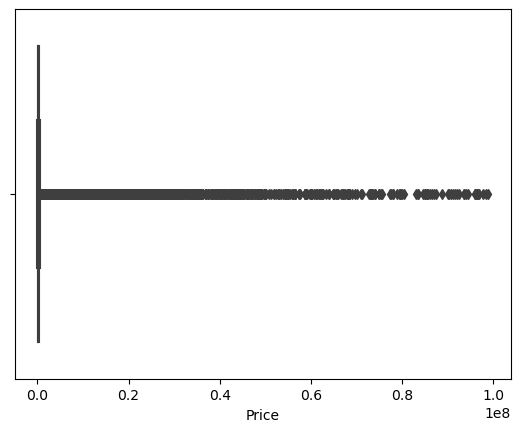

In [76]:
# Identifying outliers in the Price data

sns.boxplot(x = london_data['Price'])

In [80]:
london_data.describe()

,Price
count,2.993422e+06
mean,3.138096e+05
std,8.048189e+05
min,1.000000e+00
25%,1.280000e+05
50%,2.150000e+05
75%,3.399580e+05
max,9.890000e+07


In [81]:
# Average price per property type in Greater London 1995-2017
# D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other

london_data.groupby(['Property Type'])['Price'].mean()

Property Type
D    5.726329e+05
F    2.650960e+05
O    3.258731e+06
S    3.140532e+05
T    3.088284e+05
Name: Price, dtype: float64

In [83]:
# Average price paid per year

london_data.groupby([london_data['year']])['Price'].mean()

year
1995     97661.786053
1996    105407.923306
1997    119831.867679
1998    135089.831280
1999    158347.930010
2000    188708.198031
2001    204885.494563
2002    233286.442054
2003    250669.803239
2004    274105.922126
2005    290242.428709
2006    316047.501434
2007    352778.211139
2008    361891.286101
2009    362680.355373
2010    408191.775254
2011    421144.390471
2012    438041.535884
2013    512362.499934
2014    583380.206099
2015    636595.572511
2016    681429.272860
2017    741244.561411
Name: Price, dtype: float64

In [ ]:
# export to csv 
london_data.to_csv('london_clean_data_95_17.csv')